In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%matplotlib inline

In [3]:
beta = 1.61e-11 # m-1 s-1
L = 7e6 # m (Channel Width)
k0 = 1.5e-6 # m-1 (zonal wavenumber)
c = -2 # m s-1 (zonal phase speed)
# will use c = -5 m s-1 for part d
u0 = 0
r0 = 0

In [4]:
y = np.linspace(0, L, 16)

In [5]:
y

array([      0.        ,  466666.66666667,  933333.33333333,
       1400000.        , 1866666.66666667, 2333333.33333333,
       2800000.        , 3266666.66666667, 3733333.33333333,
       4200000.        , 4666666.66666667, 5133333.33333333,
       5600000.        , 6066666.66666667, 6533333.33333333,
       7000000.        ])

In [6]:
dy = y[1] - y[0]
dy

466666.6666666667

### 2.a.ii.
Use up-down sweep to calculate the solution throughout the grid. Plot the magnitude and phase of psi for all y_n using the radiation condition at the poleward boundary. Show that the magnitude of psi_n approaches unity (one) throughout the entire grid as the grid spacing d goes to zero, and that the magnitude of the reflection coefficient R approaches zero. (Here, just pick two small values of d and sow that the incident magnitude is close to unity and the reflection coefficient approaches zero as d is decreased.) Thus, the solution consists almost entirely (to within numerical error) of a poleward propagating wave. 


### First step is to solve for l everywhere

In [7]:
# assume without loss of generality that u_bar == 0.
lsq = ((beta/(u0 - c)) - k0**2)
lsq # get real and imaginary values but there is no imaginary component so that is why it is two values (the second one
# is zero in the debugging text file.)

5.8e-12

In [8]:
l0 = lsq**(1/2)
l0

2.408318915758459e-06

### First get a_o and b_o using equation (18)

In [9]:
a0 = (1 - (dy*l0*1j) - ((dy**2)*lsq)/2)**-1
a0

(0.2633886215268251+0.8034258014348958j)

In [10]:
b0 = (-2j * dy * l0) * (1 - (dy*l0*1j) - ((dy**2)*lsq)/2)**-1
b0

(1.805911851337122-0.5920355461240252j)

In [11]:
abs(a0)

0.8454978322628071

In [12]:
abs(b0)

1.9004798611598714

In [13]:
(2 - ((dy**2)*lsq) - a0)**-1

(0.5444437226596085+0.9238012401786445j)

In [14]:
N = 16

a = np.zeros((N), dtype = 'complex')
b = np.zeros((N), dtype = 'complex')

a[0] = a0
b[0] = b0

for j in np.arange(1, N, 1):
    a[j] = (2 - ((dy**2)*lsq) - a[j-1])**-1
    b[j] = b[j-1] * (2 - ((dy**2)*lsq) - a[j-1])**-1


In [15]:
a

array([0.26338862+0.8034258j , 0.54444372+0.92380124j,
       0.21612274+1.0374615j , 0.38646157+0.7699022j ,
       0.48973231+1.07596059j, 0.20279056+0.88281949j,
       0.50167447+0.82922558j, 0.31659911+1.11613938j,
       0.29547711+0.78468156j, 0.54456993+0.96806203j,
       0.19742625+0.99377019j, 0.42191694+0.77723358j,
       0.44784904+1.10512481j, 0.22151281+0.8469396j ,
       0.52433209+0.8616574j , 0.26986751+1.09398216j])

In [16]:
b

array([ 1.80591185-0.59203555j,  1.53014054+1.34597357j,
       -1.06569761+1.8783574j , -1.85800267-0.09456997j,
       -0.80817037-2.04545161j,  1.64187523-1.12826683j,
        1.7592746 +0.79546228j, -0.33086201+2.21543831j,
       -1.83617573+0.39499j   , -1.3823009 -1.56243233j,
        1.2797962 -1.68215459j,  1.84739474+0.28497107j,
        0.51242536+2.16922578j, -1.72369445+0.91450462j,
       -1.691778  -1.00572996j,  0.64369471-2.12218879j])

In [17]:
len(b)

16

In [18]:
a[-2]

(0.5243320937771919+0.8616574029792139j)

In [19]:
lsq, l0

(5.8e-12, 2.408318915758459e-06)

In [20]:
a1 = (2 - ((dy**2)*lsq) - a0)**-1
a1

(0.5444437226596085+0.9238012401786445j)

In [21]:
b1 = b0 * (2 - ((dy**2)*lsq) - a0)**-1
b1


(1.5301405428763037+1.3459735712399665j)

In [22]:
#need to calculate psi_N eqn 22 
psi_N = b[-2] / (1 - (dy*l0*1j) - (((dy**2)*lsq)/2) - a[-2])
psi_N

(0.569909994418416-0.8073050243181463j)

In [23]:
psi_N = b[-2] * (1 - (dy*l0*1j) - (((dy**2)*lsq)/2) - a[-2])**-1
psi_N

(0.569909994418416-0.8073050243181463j)

In [24]:
# now to solve for psi have to go backwards
psi = np.zeros((N), dtype = 'complex')
psi[-1] = psi_N
#psi[-1] = 0 # for part iii

for j in reversed(np.arange(1, N, 1)):
    psi[j-1] = a[j-1]*psi[j] + b[j-1]

In [25]:
psi
# last value is wrong?

array([ 1.12513188+0.08833577j,  0.51382759+1.01579549j,
       -0.74649804+0.66019264j, -1.0639137 -0.52930687j,
       -0.03748814-1.050233j  ,  1.0362891 -0.24459815j,
        0.80111807+0.86999133j, -0.4459541 +0.8856851j ,
       -1.12973669-0.21733982j, -0.38653631-1.0458404j ,
        0.84490238-0.55332835j,  1.00913549+0.63809889j,
       -0.10128165+1.02353633j, -1.08376881+0.11613366j,
       -0.69733554-0.93795873j,  0.56990999-0.80730502j])

In [26]:
# have to plot magnitude and phase of psi 
import cmath as cm

psi_phase_test = np.zeros((N), dtype = 'complex')

for j in np.arange(1, N):
    psi_phase_test[j] = np.angle(psi[j])

In [27]:
psi_phase_test2 = np.zeros((N), dtype = 'complex')

for j in np.arange(1, N):
    psi_phase_test2[j] = cm.phase(psi[j])

In [28]:
psi_mag = abs(psi)

/Users/ariannavaruolo/Downloads/pwd/envs/geo_scipy/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


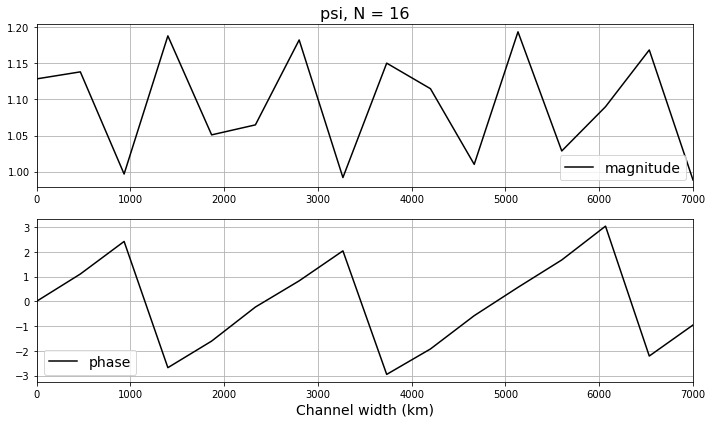

In [29]:
fig, ax = plt.subplots(nrows = 2, figsize = (10,6))

ax[0].plot(y/1000, psi_mag, 'k')
#plt.plot(T_surf, tao_values)
ax[0].set_title('psi, N = 16', fontsize = 16)
ax[0].set_xlabel('')
#ax[0].set_ylabel('Magnitude', fontsize = 14);
ax[0].grid()
#ax.set_ylim(0, 20);
ax[0].set_xlim(0, 7000);
#plt.axhline(y = pi_B_sfc, color = 'k', linewidth = 1.5, linestyle = '--')
#plt.axhline(y = pi_B_above, color = 'k', linewidth = 1.5, linestyle = ':')
#plt.axhline(y = So, color = 'k', linewidth = 1.5, linestyle = '-.')
ax[0].legend(['magnitude'], fontsize = 14)

ax[1].plot(y/1000, psi_phase_test, 'k')
ax[1].set_xlabel('Channel width (km)', fontsize = 14)
#ax[1].set_ylabel('Phase', fontsize = 14);
ax[1].set_xlim(0, 7000);
ax[1].grid()
ax[1].legend(['phase'], fontsize = 14)

plt.tight_layout()

#fig.savefig('atmos_dynamics_2.a.ii.N_16.png')

In [32]:
# Function for question 2. a.ii.
N = 50 ## CHANGE N HERE!!!
y50, mag50, phase50 = get_mag_phase(N)

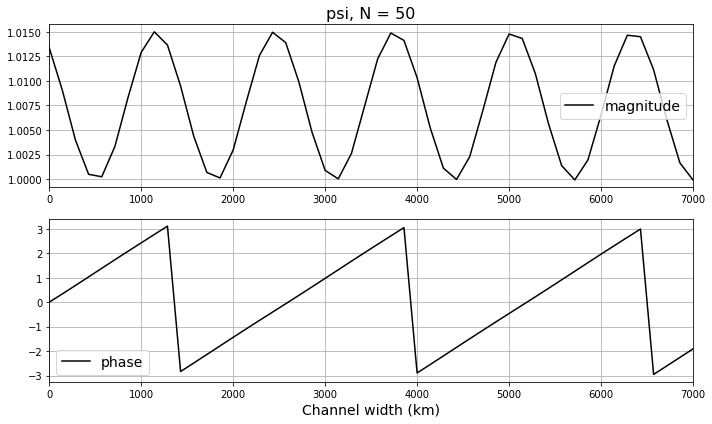

In [33]:
fig, ax = plt.subplots(nrows = 2, figsize = (10,6))

ax[0].plot(y50/1000, mag50, 'k')
#plt.plot(T_surf, tao_values)
ax[0].set_title('psi, N = 50', fontsize = 16)
ax[0].set_xlabel('')
#ax[0].set_ylabel('Magnitude', fontsize = 14);
ax[0].grid()
ax[0].set_xlim(0, 7000);
#ax.set_xlim(150, 350)
#plt.axhline(y = pi_B_sfc, color = 'k', linewidth = 1.5, linestyle = '--')
#plt.axhline(y = pi_B_above, color = 'k', linewidth = 1.5, linestyle = ':')
#plt.axhline(y = So, color = 'k', linewidth = 1.5, linestyle = '-.')
ax[0].legend(['magnitude'], fontsize = 14)

ax[1].plot(y50/1000, phase50, 'k')
ax[1].set_xlabel('Channel width (km)', fontsize = 14)
#ax[1].set_ylabel('Phase', fontsize = 14);
ax[1].set_xlim(0, 7000);
ax[1].grid()
ax[1].legend(['phase'], fontsize = 14)

plt.tight_layout()

#fig.savefig('atmos_dynamics_2.a.ii.N_50.png')

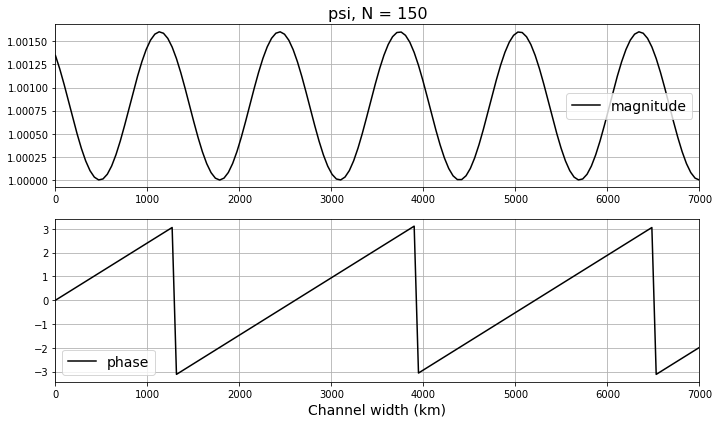

In [34]:
# Function for question 2. a.ii.
N = 150 ## CHANGE N HERE!!!
y150, mag150, phase150 = get_mag_phase(N)

fig, ax = plt.subplots(nrows = 2, figsize = (10,6))

ax[0].plot(y150/1000, mag150, 'k')
#plt.plot(T_surf, tao_values)
ax[0].set_title('psi, N = 150', fontsize = 16)
ax[0].set_xlabel('')
#ax[0].set_ylabel('Magnitude', fontsize = 14);
ax[0].grid()
ax[0].set_xlim(0, 7000);
#ax.set_xlim(150, 350)
#plt.axhline(y = pi_B_sfc, color = 'k', linewidth = 1.5, linestyle = '--')
#plt.axhline(y = pi_B_above, color = 'k', linewidth = 1.5, linestyle = ':')
#plt.axhline(y = So, color = 'k', linewidth = 1.5, linestyle = '-.')
ax[0].legend(['magnitude'], fontsize = 14)

ax[1].plot(y150/1000, phase150, 'k')
ax[1].set_xlabel('Channel width (km)', fontsize = 14)
#ax[1].set_ylabel('Phase', fontsize = 14);
ax[1].set_xlim(0, 7000);
ax[1].grid()
ax[1].legend(['phase'], fontsize = 14)

plt.tight_layout()

#fig.savefig('atmos_dynamics_2.a.ii.N_150.png')

In [35]:
# Here we show that R, the reflection coefficient (mag - 1) approaches zero as dy decreases (or as N increases)!!
mag50[0] - 1, psi_mag[0] - 1

(0.013394221876062318, 0.12859424059723112)

In [31]:
def get_mag_phase(N):

    y = np.linspace(0, L, N)
    dy = y[1] - y[0]

    a0 = (1 - (dy*l0*1j) - ((dy**2)*lsq)/2)**-1
    b0 = (-2j * dy * l0) * (1 - (dy*l0*1j) - ((dy**2)*lsq)/2)**-1

    a = np.zeros((N), dtype = 'complex')
    b = np.zeros((N), dtype = 'complex')
    a[0] = a0
    b[0] = b0

    for j in np.arange(1, N, 1):
        a[j] = (2 - ((dy**2)*lsq) - a[j-1])**-1
        b[j] = b[j-1] * (2 - ((dy**2)*lsq) - a[j-1])**-1

    #need to calculate psi_N eqn 22 
    psi_N = b[-2] / (1 - (dy*l0*1j) - (((dy**2)*lsq)/2) - a[-2])
    
    # now to solve for psi have to go backwards
    psi = np.zeros((N), dtype = 'complex')
    psi[-1] = psi_N

    for j in reversed(np.arange(1, N, 1)):
        psi[j-1] = a[j-1]*psi[j] + b[j-1]
    
    # get magnitude
    mag = abs(psi)

    # get phase
    phase = np.zeros((N), dtype = 'complex')

    for j in np.arange(1, N):
        phase[j] = cm.phase(psi[j])

    return(y, mag, phase)    

In [36]:
# l eventually becomes negative so then it becomes complex 


In [37]:
psi

array([ 1.12513188+0.08833577j,  0.51382759+1.01579549j,
       -0.74649804+0.66019264j, -1.0639137 -0.52930687j,
       -0.03748814-1.050233j  ,  1.0362891 -0.24459815j,
        0.80111807+0.86999133j, -0.4459541 +0.8856851j ,
       -1.12973669-0.21733982j, -0.38653631-1.0458404j ,
        0.84490238-0.55332835j,  1.00913549+0.63809889j,
       -0.10128165+1.02353633j, -1.08376881+0.11613366j,
       -0.69733554-0.93795873j,  0.56990999-0.80730502j])

In [39]:
psi = np.zeros((N), dtype = 'complex')

for j in np.arange(N, 1, 1):
    psi[j-1] = (a[j]*psi[j-1]) + b[j]

In [40]:
psi

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
      

In [43]:
# 2.a.iii.
# now set psi[-1] = 0 

def get_mag_phase2(N):

    y = np.linspace(0, L, N)
    dy = y[1] - y[0]

    a0 = (1 - (dy*l0*1j) - ((dy**2)*lsq)/2)**-1
    b0 = (-2j * dy * l0) * (1 - (dy*l0*1j) - ((dy**2)*lsq)/2)**-1

    a = np.zeros((N), dtype = 'complex')
    b = np.zeros((N), dtype = 'complex')
    a[0] = a0
    b[0] = b0

    for j in np.arange(1, N, 1):
        a[j] = (2 - ((dy**2)*lsq) - a[j-1])**-1
        b[j] = b[j-1] * (2 - ((dy**2)*lsq) - a[j-1])**-1

    #need to calculate psi_N eqn 22 
    psi_N = b[-2] / (1 - (dy*l0*1j) - (((dy**2)*lsq)/2) - a[-2])
    
    # now to solve for psi have to go backwards
    psi = np.zeros((N), dtype = 'complex')
    #psi[-1] = psi_N
    psi[-1] = 0

    for j in reversed(np.arange(1, N, 1)):
        psi[j-1] = a[j-1]*psi[j] + b[j-1]
    
    # get magnitude
    mag = abs(psi)

    # get phase
    phase = np.zeros((N), dtype = 'complex')

    for j in np.arange(1, N):
        phase[j] = cm.phase(psi[j])

    return(y, mag, phase)  

In [44]:
# Function for question 2. a.iii.
N = 16 ## CHANGE N HERE!!!
y16_2, mag16_2, phase16_2 = get_mag_phase2(N)

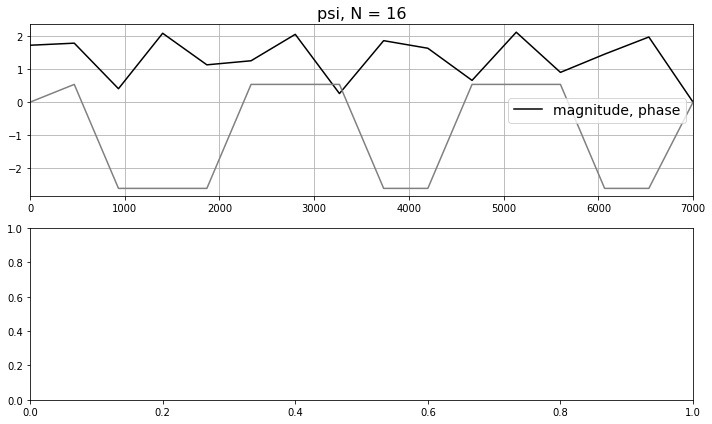

In [45]:
fig, ax = plt.subplots(nrows = 2, figsize = (10,6))

ax[0].plot(y16_2/1000, mag16_2, 'k', y16_2/1000, phase16_2, 'grey')
#plt.plot(T_surf, tao_values)
ax[0].set_title('psi, N = 16', fontsize = 16)
ax[0].set_xlabel('')
#ax[0].set_ylabel('Magnitude', fontsize = 14);
ax[0].grid()
#ax.set_ylim(0, 20);
ax[0].set_xlim(0, 7000);
#plt.axhline(y = pi_B_sfc, color = 'k', linewidth = 1.5, linestyle = '--')
#plt.axhline(y = pi_B_above, color = 'k', linewidth = 1.5, linestyle = ':')
#plt.axhline(y = So, color = 'k', linewidth = 1.5, linestyle = '-.')
ax[0].legend(['magnitude, phase'], fontsize = 14, loc = 'best')

#ax[1].plot(y16_2/1000, phase16_2, 'k')
#ax[1].set_xlabel('Channel width (km)', fontsize = 14)
#ax[1].set_ylabel('Phase', fontsize = 14);
#ax[1].set_xlim(0, 7000);
#ax[1].grid()
#ax[1].legend(['phase'], fontsize = 14)

plt.tight_layout()

#fig.savefig('atmos_dynamics_2.a.iii.N_16.png')

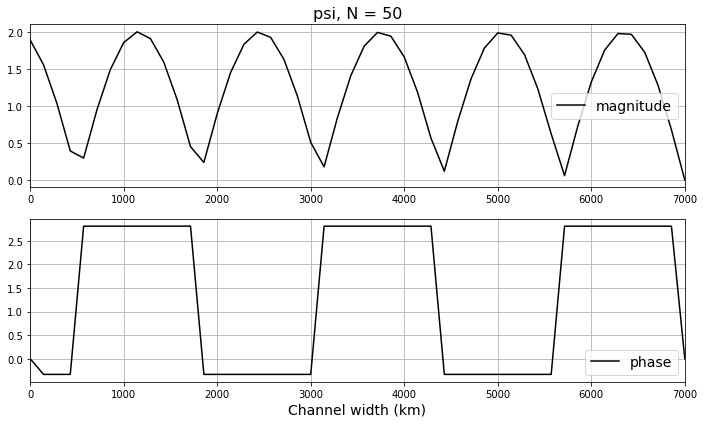

In [46]:
# Function for question 2. a.iii.
N = 50 ## CHANGE N HERE!!!
y50_2, mag50_2, phase50_2 = get_mag_phase2(N)

fig, ax = plt.subplots(nrows = 2, figsize = (10,6))

ax[0].plot(y50_2/1000, mag50_2, 'k')
#plt.plot(T_surf, tao_values)
ax[0].set_title('psi, N = 50', fontsize = 16)
ax[0].set_xlabel('')
#ax[0].set_ylabel('Magnitude', fontsize = 14);
ax[0].grid()
#ax.set_ylim(0, 20);
ax[0].set_xlim(0, 7000);
#plt.axhline(y = pi_B_sfc, color = 'k', linewidth = 1.5, linestyle = '--')
#plt.axhline(y = pi_B_above, color = 'k', linewidth = 1.5, linestyle = ':')
#plt.axhline(y = So, color = 'k', linewidth = 1.5, linestyle = '-.')
ax[0].legend(['magnitude'], fontsize = 14)

ax[1].plot(y50_2/1000, phase50_2, 'k')
ax[1].set_xlabel('Channel width (km)', fontsize = 14)
#ax[1].set_ylabel('Phase', fontsize = 14);
ax[1].set_xlim(0, 7000);
ax[1].grid()
ax[1].legend(['phase'], fontsize = 14)

plt.tight_layout()

#fig.savefig('atmos_dynamics_2.a.iii.N_50.png')

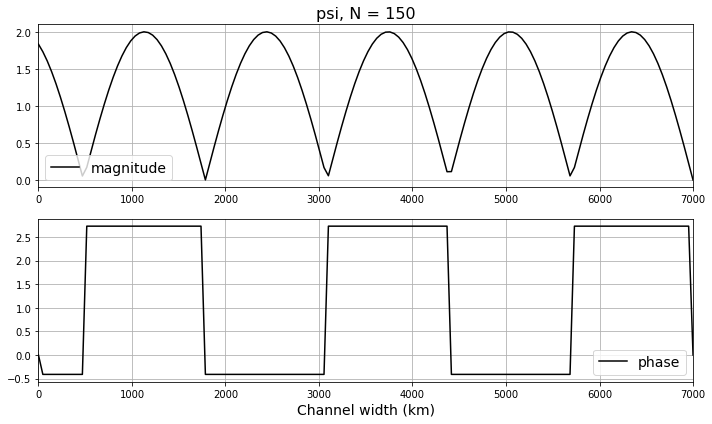

In [47]:
# Function for question 2. a.iii.
N = 150 ## CHANGE N HERE!!!
y150_2, mag150_2, phase150_2 = get_mag_phase2(N)

fig, ax = plt.subplots(nrows = 2, figsize = (10,6))

ax[0].plot(y150_2/1000, mag150_2, 'k')
#plt.plot(T_surf, tao_values)
ax[0].set_title('psi, N = 150', fontsize = 16)
ax[0].set_xlabel('')
#ax[0].set_ylabel('Magnitude', fontsize = 14);
ax[0].grid()
#ax.set_ylim(0, 20);
ax[0].set_xlim(0, 7000);
#plt.axhline(y = pi_B_sfc, color = 'k', linewidth = 1.5, linestyle = '--')
#plt.axhline(y = pi_B_above, color = 'k', linewidth = 1.5, linestyle = ':')
#plt.axhline(y = So, color = 'k', linewidth = 1.5, linestyle = '-.')
ax[0].legend(['magnitude'], fontsize = 14)

ax[1].plot(y150_2/1000, phase150_2, 'k')
ax[1].set_xlabel('Channel width (km)', fontsize = 14)
#ax[1].set_ylabel('Phase', fontsize = 14);
ax[1].set_xlim(0, 7000);
ax[1].grid()
ax[1].legend(['phase'], fontsize = 14)

plt.tight_layout()

#fig.savefig('atmos_dynamics_2.a.iii.N_150.png')

In [48]:
# check that reflection coefficient R approaches -e^(2il0L)
# Here we show that R, the reflection coefficient (mag - 1) approaches zero as dy decreases (or as N increases)!!
mag50_2[0] - 1, mag16_2[0] - 1

(0.8910420334035367, 0.7191575192989941)

In [49]:
l0

2.408318915758459e-06

In [50]:
L

7000000.0

In [51]:
np.exp(2*1j*l0*L)

(-0.6666773264552646+0.745346457957949j)

In [52]:
abs(-(np.exp(2*1j*l0*L)))

1.0

In [53]:
u0 = 0
# assume without loss of generality that u_bar == 0.
lsq = ((beta/(u0 - c)) - k0**2)
lsq
l0 = lsq**(1/2)

In [54]:
l0 = lsq**(1/2)
l0

2.408318915758459e-06

In [55]:
N = 16
u = np.zeros(16)

In [56]:
u

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [57]:
lsq = ((beta/(u - c)) - k0**2)
lsq



array([5.8e-12, 5.8e-12, 5.8e-12, 5.8e-12, 5.8e-12, 5.8e-12, 5.8e-12,
       5.8e-12, 5.8e-12, 5.8e-12, 5.8e-12, 5.8e-12, 5.8e-12, 5.8e-12,
       5.8e-12, 5.8e-12])

In [58]:
N = 16
y = np.linspace(0, L, N)
dy = y[1] - y[0]

u = np.zeros(16)
lsq = ((beta/(u - c)) - k0**2)
l0 = lsq**(1/2)

a0 = (1 - (dy*l0[0]*1j) - ((dy**2)*lsq[0])/2)**-1
b0 = (-2j * dy * l0[0]) * (1 - (dy*l0[0]*1j) - ((dy**2)*lsq[0])/2)**-1

In [59]:
a0

(0.2633886215268251+0.8034258014348958j)

In [60]:
a = np.zeros((N), dtype = 'complex')
b = np.zeros((N), dtype = 'complex')
a[0] = a0

In [61]:
a

array([0.26338862+0.8034258j, 0.        +0.j       ,
       0.        +0.j       , 0.        +0.j       ,
       0.        +0.j       , 0.        +0.j       ,
       0.        +0.j       , 0.        +0.j       ,
       0.        +0.j       , 0.        +0.j       ,
       0.        +0.j       , 0.        +0.j       ,
       0.        +0.j       , 0.        +0.j       ,
       0.        +0.j       , 0.        +0.j       ])

In [62]:
N = 16
y = np.linspace(0, L, N)
dy = y[1] - y[0]

#u = np.zeros(N)
u0 = 3 # CHANGE THIS
u_bar = u0 * np.sin((np.pi*y)/L)**4
uyy = -((4*((np.pi)**2)*u0)/L**2) * (np.sin((np.pi*y)/L)**2) * ((np.sin((np.pi*y)/L)**2) - 3*(np.cos((np.pi*y)/L)**2))
lsq = (((beta - uyy)/(u_bar - c)) - k0**2)
l0 = lsq**(1/2)



In [63]:
uyy

array([ 0.00000000e+00,  2.95380966e-13,  9.34984770e-13,  1.35116978e-12,
        1.05578881e-12, -6.03778521e-28, -1.35116978e-12, -2.28615455e-12,
       -2.28615455e-12, -1.35116978e-12,  8.05038028e-28,  1.05578881e-12,
        1.35116978e-12,  9.34984770e-13,  2.95380966e-13,  1.08749650e-43])

In [64]:
lsq

array([5.80000000e-12, 5.63022208e-12, 5.03349846e-12, 4.00455797e-12,
       2.91098679e-12, 2.11610169e-12, 1.66773143e-12, 1.47581483e-12,
       1.47581483e-12, 1.66773143e-12, 2.11610169e-12, 2.91098679e-12,
       4.00455797e-12, 5.03349846e-12, 5.63022208e-12, 5.80000000e-12])

In [65]:
l0

array([2.40831892e-06, 2.37280890e-06, 2.24354596e-06, 2.00113917e-06,
       1.70616142e-06, 1.45468268e-06, 1.29140676e-06, 1.21483119e-06,
       1.21483119e-06, 1.29140676e-06, 1.45468268e-06, 1.70616142e-06,
       2.00113917e-06, 2.24354596e-06, 2.37280890e-06, 2.40831892e-06])

In [66]:
lsq

array([5.80000000e-12, 5.63022208e-12, 5.03349846e-12, 4.00455797e-12,
       2.91098679e-12, 2.11610169e-12, 1.66773143e-12, 1.47581483e-12,
       1.47581483e-12, 1.66773143e-12, 2.11610169e-12, 2.91098679e-12,
       4.00455797e-12, 5.03349846e-12, 5.63022208e-12, 5.80000000e-12])

In [67]:
uyy

array([ 0.00000000e+00,  2.95380966e-13,  9.34984770e-13,  1.35116978e-12,
        1.05578881e-12, -6.03778521e-28, -1.35116978e-12, -2.28615455e-12,
       -2.28615455e-12, -1.35116978e-12,  8.05038028e-28,  1.05578881e-12,
        1.35116978e-12,  9.34984770e-13,  2.95380966e-13,  1.08749650e-43])

In [68]:
# 2.b.i.
# need to get the derivatives for u and l. 
# first try rewriting this function with vectors for u and l0 and lsq

def get_mag_phase_2b(N, u):

    y = np.linspace(0, L, N)
    dy = y[1] - y[0]

    #u = np.zeros(N)
    u0 = u # CHANGE THIS
    u_bar = u0 * np.sin((np.pi*y)/L)**4
    uyy = -((4*((np.pi)**2)*u0)/L**2) * (np.sin((np.pi*y)/L)**2) * ((np.sin((np.pi*y)/L)**2) - 3*(np.cos((np.pi*y)/L)**2))
    lsq = (((beta - uyy)/(u_bar - c)) - k0**2)
    l0 = lsq**(1/2)
    qy = beta - uyy

    a0 = (1 - (dy*l0[0]*1j) - ((dy**2)*lsq[0])/2)**-1
    b0 = (-2j * dy * l0[0]) * (1 - (dy*l0[0]*1j) - ((dy**2)*lsq[0])/2)**-1

    a = np.zeros((N), dtype = 'complex')
    b = np.zeros((N), dtype = 'complex')
    a[0] = a0
    b[0] = b0

    for j in np.arange(1, N, 1):
        a[j] = (2 - ((dy**2)*lsq[j]) - a[j-1])**-1
        b[j] = b[j-1] * (2 - ((dy**2)*lsq[j]) - a[j-1])**-1

    #need to calculate psi_N eqn 22 
    psi_N = b[-2] / (1 - (dy*l0[-2]*1j) - (((dy**2)*lsq[-2])/2) - a[-2]) # should l0 and lsq be the 1st or 2nd to last position
    
    # now to solve for psi have to go backwards
    psi = np.zeros((N), dtype = 'complex')
    psi[-1] = psi_N
    #psi[-1] = 0

    for j in reversed(np.arange(1, N, 1)):
        psi[j-1] = a[j-1]*psi[j] + b[j-1]
    
    l0_int = np.cumsum(l0) * dy
    wkb_psi = ((l0[0]/l0)**(1/2)) * np.exp(1j * l0_int)  
    
    # get magnitude
    mag = abs(psi)
    wkb_mag = abs(wkb_psi)
    
    # get phase
    phase = np.zeros((N), dtype = 'complex')

    for j in np.arange(1, N):
        phase[j] = cm.phase(psi[j])
        
    wkb_phase = np.zeros((N), dtype = 'complex')

    for j in np.arange(1, N):
        wkb_phase[j] = cm.phase(wkb_psi[j])

    return(y, mag, phase, wkb_mag, wkb_phase, u_bar, qy, l0, lsq)  

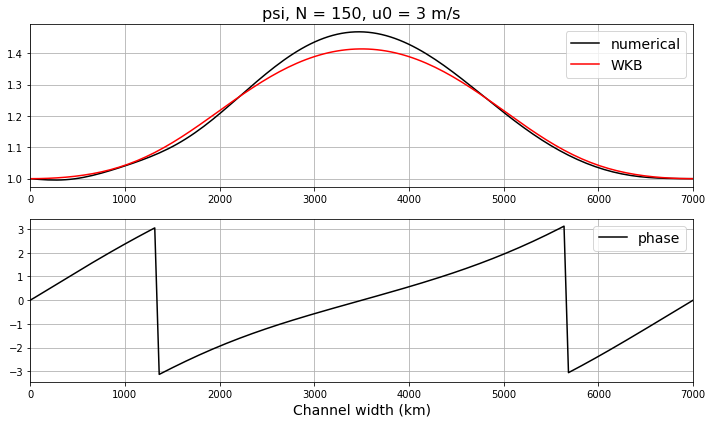

In [69]:
# Function for question 2. b.i.
N = 150 ## CHANGE N HERE!!!
u = 3 # m/s wind 
y150_2, mag150_2, phase150_2, wkb_mag, wkb_phase, u_bar, qy, l0, lsq = get_mag_phase_2b(N, u)

fig, ax = plt.subplots(nrows = 2, figsize = (10,6))

ax[0].plot(y150_2/1000, mag150_2, 'k', y150_2/1000, wkb_mag, 'r')
#plt.plot(T_surf, tao_values)
ax[0].set_title('psi, N = 150, u0 = 3 m/s', fontsize = 16)
ax[0].set_xlabel('')
#ax[0].set_ylabel('Magnitude', fontsize = 14);
ax[0].grid()
#ax.set_ylim(0, 20);
ax[0].set_xlim(0, 7000);
#plt.axhline(y = pi_B_sfc, color = 'k', linewidth = 1.5, linestyle = '--')
#plt.axhline(y = pi_B_above, color = 'k', linewidth = 1.5, linestyle = ':')
#plt.axhline(y = So, color = 'k', linewidth = 1.5, linestyle = '-.')
ax[0].legend(['numerical', 'WKB'], fontsize = 14)

ax[1].plot(y150_2/1000, phase150_2, 'k')
ax[1].set_xlabel('Channel width (km)', fontsize = 14)
#ax[1].set_ylabel('Phase', fontsize = 14);
ax[1].set_xlim(0, 7000);
ax[1].grid()
ax[1].legend(['phase'], fontsize = 14)

plt.tight_layout()

#fig.savefig('atmos_dynamics_2.b.ii.N_150_u_3.png')

/Users/ariannavaruolo/Downloads/pwd/envs/geo_scipy/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


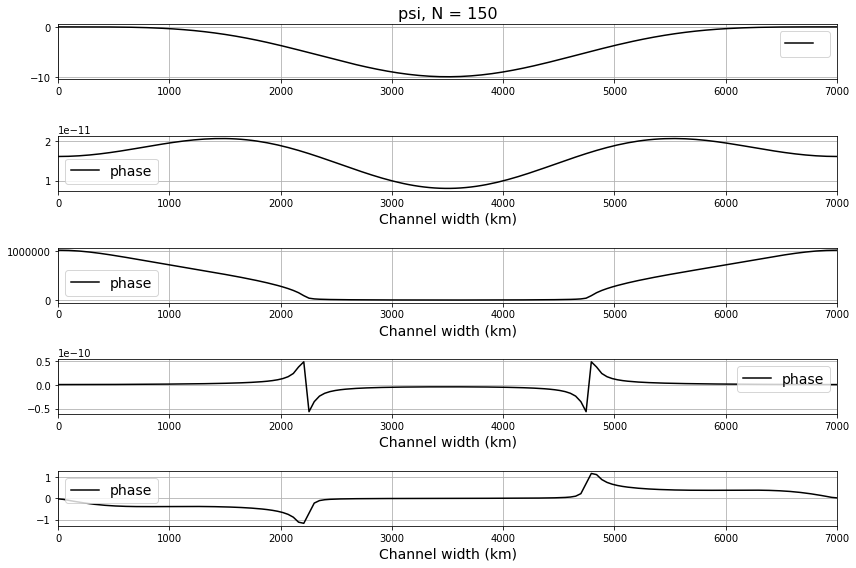

In [254]:
### plot as functions of latitude the zonal-mean wind (u_bar),the meridional gradient of basic state potential
### vorticity (qy), the meridional scale l_inverse, the index of refraction (l^2) and the WKB 'small' parameter (E)
fig, ax = plt.subplots(nrows = 5, figsize = (12,8))

ax[0].plot(y150_2/1000, u_bar, 'k')
#plt.plot(T_surf, tao_values)
ax[0].set_title('psi, N = 150', fontsize = 16)
ax[0].set_xlabel('')
ax[0].grid()
ax[0].set_xlim(0, 7000);
ax[0].legend([''], fontsize = 14)

ax[1].plot(y150_2/1000, qy, 'k')
ax[1].set_xlabel('Channel width (km)', fontsize = 14)
ax[1].set_xlim(0, 7000);
ax[1].grid()
ax[1].legend(['phase'], fontsize = 14)

ax[2].plot(y150_2/1000, 1/l0, 'k')
ax[2].set_xlabel('Channel width (km)', fontsize = 14)
ax[2].set_xlim(0, 7000);
ax[2].grid()
ax[2].legend(['phase'], fontsize = 14)

ax[3].plot(y150_2/1000, lsq, 'k')
ax[3].set_xlabel('Channel width (km)', fontsize = 14)
ax[3].set_xlim(0, 7000);
ax[3].grid()
ax[3].legend(['phase'], fontsize = 14)

epsilon = (1/l0[j])
ax[4].plot(y150_2/1000, eps, 'k')
ax[4].set_xlabel('Channel width (km)', fontsize = 14)
ax[4].set_xlim(0, 7000);
ax[4].grid()
ax[4].legend(['phase'], fontsize = 14)

plt.tight_layout()

In [253]:
#epsilon = np.zeros(l0)
dy = y150_2[1] - y150_2[0]

eps = np.gradient(1/l0, y150_2)



In [72]:
l0

array([2.40831892e-06, 2.40798402e-06, 2.40697609e-06, 2.40528546e-06,
       2.40289619e-06, 2.39978635e-06, 2.39592839e-06, 2.39128962e-06,
       2.38583286e-06, 2.37951716e-06, 2.37229867e-06, 2.36413161e-06,
       2.35496938e-06, 2.34476580e-06, 2.33347638e-06, 2.32105970e-06,
       2.30747886e-06, 2.29270288e-06, 2.27670813e-06, 2.25947959e-06,
       2.24101214e-06, 2.22131147e-06, 2.20039498e-06, 2.17829225e-06,
       2.15504534e-06, 2.13070867e-06, 2.10534866e-06, 2.07904303e-06,
       2.05187976e-06, 2.02395588e-06, 1.99537592e-06, 1.96625033e-06,
       1.93669369e-06, 1.90682298e-06, 1.87675575e-06, 1.84660852e-06,
       1.81649515e-06, 1.78652547e-06, 1.75680409e-06, 1.72742937e-06,
       1.69849267e-06, 1.67007774e-06, 1.64226038e-06, 1.61510827e-06,
       1.58868091e-06, 1.56302984e-06, 1.53819882e-06, 1.51422422e-06,
       1.49113551e-06, 1.46895566e-06, 1.44770176e-06, 1.42738553e-06,
       1.40801393e-06, 1.38958965e-06, 1.37211174e-06, 1.35557607e-06,
      

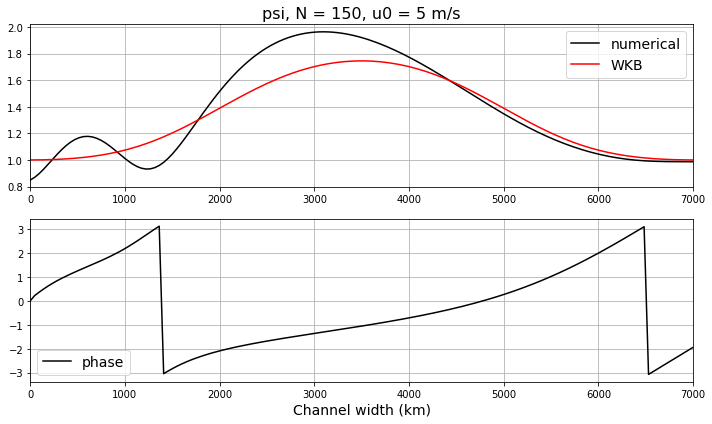

In [73]:
# Function for question 2. b.i.
N = 150 ## CHANGE N HERE!!!
u = 5 # wind 
y150_2, mag150_2, phase150_2, wkb_mag, wkb_phase, u_bar, qy, l0, lsq = get_mag_phase_2b(N, u)

fig, ax = plt.subplots(nrows = 2, figsize = (10,6))

ax[0].plot(y150_2/1000, mag150_2, 'k', y150_2/1000, wkb_mag, 'r')
#plt.plot(T_surf, tao_values)
ax[0].set_title('psi, N = 150, u0 = 5 m/s', fontsize = 16)
ax[0].set_xlabel('')
#ax[0].set_ylabel('Magnitude', fontsize = 14);
ax[0].grid()
#ax.set_ylim(0, 20);
ax[0].set_xlim(0, 7000);
#plt.axhline(y = pi_B_sfc, color = 'k', linewidth = 1.5, linestyle = '--')
#plt.axhline(y = pi_B_above, color = 'k', linewidth = 1.5, linestyle = ':')
#plt.axhline(y = So, color = 'k', linewidth = 1.5, linestyle = '-.')
ax[0].legend(['numerical', 'WKB'], fontsize = 14)

ax[1].plot(y150_2/1000, phase150_2, 'k')
ax[1].set_xlabel('Channel width (km)', fontsize = 14)
#ax[1].set_ylabel('Phase', fontsize = 14);
ax[1].set_xlim(0, 7000);
ax[1].grid()
ax[1].legend(['phase'], fontsize = 14)

plt.tight_layout()

#fig.savefig('atmos_dynamics_2.b.ii.N_150_u_5.png')

/Users/ariannavaruolo/Downloads/pwd/envs/geo_scipy/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


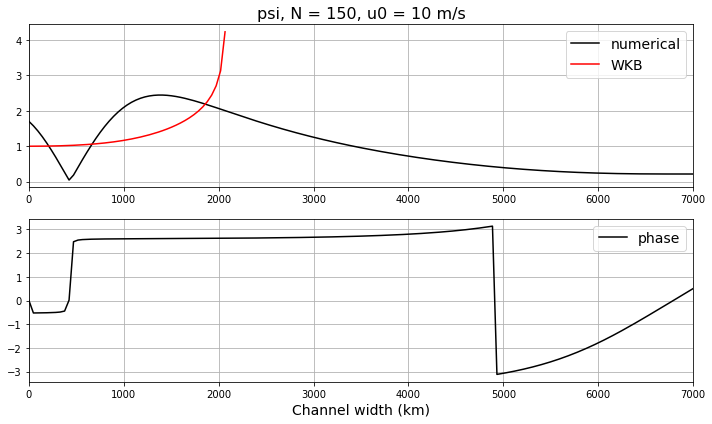

In [80]:
# Function for question 2. b.i.
N = 150 ## CHANGE N HERE!!!
u = 10 # wind 
y150_2, mag150_2, phase150_2, wkb_mag, wkb_phase, u_bar, qy, l0, lsq = get_mag_phase_2b(N, u)

fig, ax = plt.subplots(nrows = 2, figsize = (10,6))

ax[0].plot(y150_2/1000, mag150_2, 'k', y150_2/1000, wkb_mag, 'r')
#plt.plot(T_surf, tao_values)
ax[0].set_title('psi, N = 150, u0 = 10 m/s', fontsize = 16)
ax[0].set_xlabel('')
#ax[0].set_ylabel('Magnitude', fontsize = 14);
ax[0].grid()
#ax.set_ylim(0, 20);
ax[0].set_xlim(0, 7000);
#plt.axhline(y = pi_B_sfc, color = 'k', linewidth = 1.5, linestyle = '--')
#plt.axhline(y = pi_B_above, color = 'k', linewidth = 1.5, linestyle = ':')
#plt.axhline(y = So, color = 'k', linewidth = 1.5, linestyle = '-.')
ax[0].legend(['numerical', 'WKB'], fontsize = 14)

ax[1].plot(y150_2/1000, phase150_2, 'k')
ax[1].set_xlabel('Channel width (km)', fontsize = 14)
#ax[1].set_ylabel('Phase', fontsize = 14);
ax[1].set_xlim(0, 7000);
ax[1].grid()
ax[1].legend(['phase'], fontsize = 14)

plt.tight_layout()

#fig.savefig('atmos_dynamics_2.b.ii.N_150_u_10.png')

In [75]:
N = 16
y = np.linspace(0, L, N)
dy = y[1] - y[0]

#u = np.zeros(N)
u0 = 3 # CHANGE THIS
u_bar = u0 * np.sin((np.pi*y)/L)**4
uyy = -((4*((np.pi)**2)*u0)/L**2) * (np.sin((np.pi*y)/L)**2) * ((np.sin((np.pi*y)/L)**2) - 3*(np.cos((np.pi*y)/L)**2))
lsq = (((beta - uyy)/(u_bar - c)) - k0**2)
l0 = lsq**(1/2)



In [76]:
eps_test = ((1/l0[0]) - (1/l0[1]))/dy
eps_test

-0.013315801695927387

In [77]:
l0

array([2.40831892e-06, 2.37280890e-06, 2.24354596e-06, 2.00113917e-06,
       1.70616142e-06, 1.45468268e-06, 1.29140676e-06, 1.21483119e-06,
       1.21483119e-06, 1.29140676e-06, 1.45468268e-06, 1.70616142e-06,
       2.00113917e-06, 2.24354596e-06, 2.37280890e-06, 2.40831892e-06])

In [78]:
# 2.c.ii.
# need to get the derivatives for u and l. 
# first try rewriting this function with vectors for u and l0 and lsq
# for part c need to include the imaginary part of l



def get_mag_phase_2c(N, u):

    y = np.linspace(0, L, N)
    dy = y[1] - y[0]
    y[-1] = 0
    
    #u = np.zeros(N)
    u0 = u # CHANGE THIS
    u_bar = u0 * np.sin((np.pi*y)/L)**4
    uyy = -((4*((np.pi)**2)*u0)/L**2) * (np.sin((np.pi*y)/L)**2) * ((np.sin((np.pi*y)/L)**2) - 3*(np.cos((np.pi*y)/L)**2))
    lsq = (((beta - uyy)/(u_bar - c)) - k0**2)
    l_r = (((beta - u0)/(u_bar - c)) - k0**2)# real part of l
    l0 = lsq**(1/2)
    qy = beta - uyy

    a0 = (1 - (dy*l0[0]*1j) - ((dy**2)*lsq[0])/2)**-1
    b0 = (-2j * dy * l0[0]) * (1 - (dy*l0[0]*1j) - ((dy**2)*lsq[0])/2)**-1

    a = np.zeros((N), dtype = 'complex')
    b = np.zeros((N), dtype = 'complex')
    a[0] = a0
    b[0] = b0

    for j in np.arange(1, N, 1):
        a[j] = (2 - ((dy**2)*lsq[j]) - a[j-1])**-1
        b[j] = b[j-1] * (2 - ((dy**2)*lsq[j]) - a[j-1])**-1

    #need to calculate psi_N eqn 22 
    psi_N = b[-2] / (1 - (dy*l0[-2]*1j) - (((dy**2)*lsq[-2])/2) - a[-2]) # should l0 and lsq be the 1st or 2nd to last position
    
    # now to solve for psi have to go backwards
    psi = np.zeros((N), dtype = 'complex')
    psi[-1] = psi_N
    #psi[-1] = 0

    for j in reversed(np.arange(1, N, 1)):
        psi[j-1] = a[j-1]*psi[j] + b[j-1]
    
    l0_int = np.cumsum(l0) * dy
    wkb_psi = ((l0[0]/l0)**(1/2)) * np.exp(1j * l0_int)  
    
    # get magnitude
    mag = abs(psi)
    wkb_mag = abs(wkb_psi)
    
    # get phase
    phase = np.zeros((N), dtype = 'complex')

    for j in np.arange(1, N):
        phase[j] = cm.phase(psi[j])
        
    wkb_phase = np.zeros((N), dtype = 'complex')

    for j in np.arange(1, N):
        wkb_phase[j] = cm.phase(wkb_psi[j])

    return(y, mag, phase, wkb_mag, wkb_phase, u_bar, qy, l0, lsq)  

In [81]:
N = 150 ## CHANGE N HERE!!!
u = 0 # wind 
y150_2c, mag150_2c, phase150_2c, wkb_magc, wkb_phasec, u_barc, qyc, l0c, lsqc = get_mag_phase_2b(N, u)



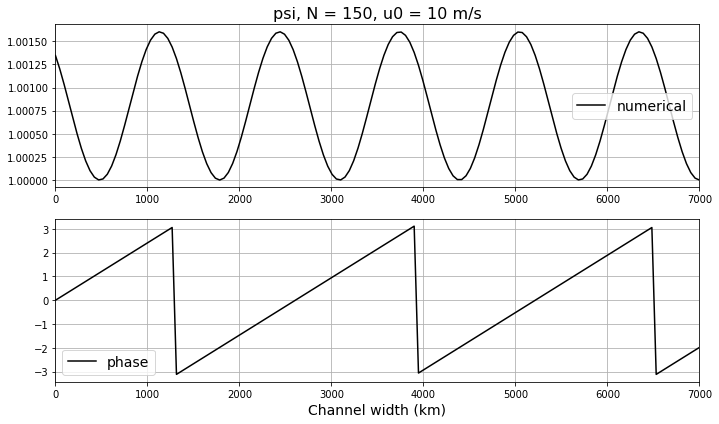

In [82]:
fig, ax = plt.subplots(nrows = 2, figsize = (10,6))

ax[0].plot(y150_2c/1000, mag150_2c, 'k')
#plt.plot(T_surf, tao_values)
ax[0].set_title('psi, N = 150, u0 = 10 m/s', fontsize = 16)
ax[0].set_xlabel('')
#ax[0].set_ylabel('Magnitude', fontsize = 14);
ax[0].grid()
#ax.set_ylim(0, 20);
ax[0].set_xlim(0, 7000);
#plt.axhline(y = pi_B_sfc, color = 'k', linewidth = 1.5, linestyle = '--')
#plt.axhline(y = pi_B_above, color = 'k', linewidth = 1.5, linestyle = ':')
#plt.axhline(y = So, color = 'k', linewidth = 1.5, linestyle = '-.')
ax[0].legend(['numerical', 'WKB'], fontsize = 14)

ax[1].plot(y150_2/1000, phase150_2c, 'k')
ax[1].set_xlabel('Channel width (km)', fontsize = 14)
#ax[1].set_ylabel('Phase', fontsize = 14);
ax[1].set_xlim(0, 7000);
ax[1].grid()
ax[1].legend(['phase'], fontsize = 14)

plt.tight_layout()

#fig.savefig('atmos_dynamics_2.b.ii.N_150_u_10.png')

In [190]:

N = 100 ## CHANGE N HERE!!!
u = 0 # wind 
r_val = 50

y = np.linspace(0, L, N)
dy = y[1] - y[0]

#u = np.zeros(N)
#    u0 = u # CHANGE THIS
u0 = np.zeros((N))
r = (1 / (r_val * 86400))
c_new = c + (r/k0)*1j
lsq = (((beta)/(u0 - c_new)) - k0**2)
l0 = np.array([cm.sqrt(l) for l in lsq])
qy = beta - uyy

a0 = (1 - (dy*l0[0]*1j) - ((dy**2)*lsq[0])/2)**-1
b0 = (-2j * dy * l0[0]) * (1 - (dy*l0[0]*1j) - ((dy**2)*lsq[0])/2)**-1

a = np.zeros((N), dtype = 'complex')
b = np.zeros((N), dtype = 'complex')
a[0] = a0
b[0] = b0

for j in np.arange(1, N, 1):
    a[j] = (2 - ((dy**2)*lsq[j]) - a[j-1])**-1
    b[j] = b[j-1] * (2 - ((dy**2)*lsq[j]) - a[j-1])**-1



In [192]:
b

array([ 0.07487949-0.32856156j,  0.12831829-0.30815264j,
        0.17698823-0.27924087j,  0.21958078-0.24287407j,
        0.25501629-0.20028463j,  0.28246117-0.15283778j,
        0.30133305-0.10198342j,  0.31129777-0.04921433j,
        0.31226223+0.00396929j,  0.30436607+0.05609032j,
        0.28797382+0.10572281j,  0.26366713+0.15152022j,
        0.23223547+0.19224586j,  0.19466258+0.22680591j,
        0.15210596+0.25428387j,  0.1058674 +0.2739739j ,
        0.05735396+0.28540922j,  0.00803082+0.28838186j,
       -0.04063117+0.28295066j, -0.08720889+0.26943587j,
       -0.13037685+0.24840098j, -0.16894985+0.22062361j,
       -0.20191569+0.18705923j, -0.22845738+0.1488013j ,
       -0.24796552+0.10704139j, -0.26004278+0.06303167j,
       -0.26450297+0.018051j  , -0.26136672-0.02662571j,
       -0.25085533-0.06975561j, -0.23338313-0.11015504j,
       -0.20954783-0.14672672j, -0.18011771-0.1784875j ,
       -0.14601392-0.20459631j, -0.1082869 -0.22438073j,
       -0.06808615-0.23736022j,

In [196]:
#### 2.c.ii.
# 2.b.i.
# need to get the derivatives for u and l. 
# first try rewriting this function with vectors for u and l0 and lsq

def get_mag_phase_2cii(N, u, r_val):

    y = np.linspace(0, L, N)
    dy = y[1] - y[0]

    #u = np.zeros(N)
#    u0 = u # CHANGE THIS
    u0 = np.zeros((N))
    u_bar = u0 * np.sin((np.pi*y)/L)**4
    uyy = -((4*((np.pi)**2)*u0)/L**2) * (np.sin((np.pi*y)/L)**2) * ((np.sin((np.pi*y)/L)**2) - 3*(np.cos((np.pi*y)/L)**2))
    r = (1 / (r_val * 86400))
    c_new = c + (r/k0)*1j
    lsq = (((beta)/(u0 - c_new)) - k0**2)
    l0 = np.array([cm.sqrt(l) for l in lsq])
    qy = beta - uyy

    a0 = (1 - (dy*l0[0]*1j) - ((dy**2)*l0[0])/2)**-1
    b0 = (-2j * dy * l0[0]) * (1 - (dy*l0[0]*1j) - ((dy**2)*lsq[0])/2)**-1

    a = np.zeros((N), dtype = 'complex')
    b = np.zeros((N), dtype = 'complex')
    a[0] = a0
    b[0] = b0

    for j in np.arange(1, N, 1):
        a[j] = (2 - ((dy**2)*lsq[j]) - a[j-1])**-1
        b[j] = b[j-1] * (2 - ((dy**2)*lsq[j]) - a[j-1])**-1

    #need to calculate psi_N eqn 22 
    psi_N = b[-2] / (1 - (dy*l0[-2]*1j) - (((dy**2)*lsq[-2])/2) - a[-2]) # should l0 and lsq be the 1st or 2nd to last position
    
    # now to solve for psi have to go backwards
    psi = np.zeros((N), dtype = 'complex')
    #psi[-1] = psi_N
    psi[-1] = 0

    for j in reversed(np.arange(1, N, 1)):
        psi[j-1] = a[j-1]*psi[j] + b[j-1]
    
    l0_int = np.cumsum(l0) * dy
    wkb_psi = ((l0[0]/l0)**(1/2)) * np.exp(1j * l0_int)  
    
    # get magnitude
    mag = abs(psi)
    wkb_mag = abs(wkb_psi)
    
    # get phase
    phase = np.zeros((N), dtype = 'complex')

    for j in np.arange(1, N):
        phase[j] = cm.phase(psi[j])
        
    wkb_phase = np.zeros((N), dtype = 'complex')

    for j in np.arange(1, N):
        wkb_phase[j] = cm.phase(wkb_psi[j])

    return(y, mag, phase, wkb_mag, wkb_phase, u_bar, qy, l0, lsq, a0, b0)  

In [206]:
# 2.c.ii.
N = 150 ## CHANGE N HERE!!!
u = 0 # wind 
r = 50
y150_2c, mag150_2c, phase150_2c, wkb_magc, wkb_phasec, u_barc, qyc, l0c, lsqc, acheck, bcheck = get_mag_phase_2cii(N,
                                                                                                                   u,
                                                                                                                   r)



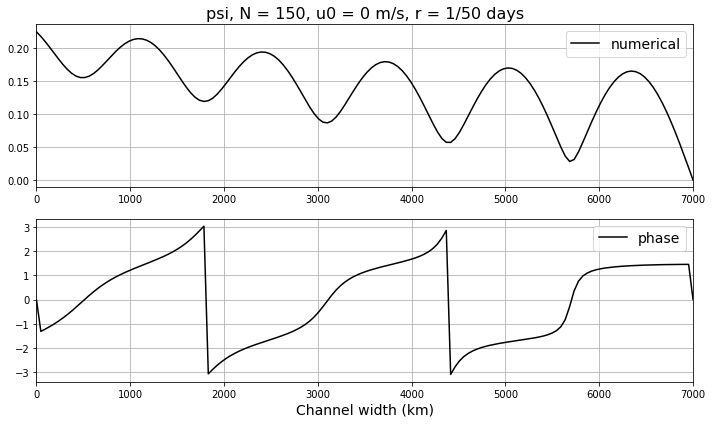

In [208]:
fig, ax = plt.subplots(nrows = 2, figsize = (10,6))

ax[0].plot(y150_2c/1000, mag150_2c, 'k')
#plt.plot(T_surf, tao_values)
ax[0].set_title('psi, N = 150, u0 = 0 m/s, r = 1/50 days', fontsize = 16)
ax[0].set_xlabel('')
#ax[0].set_ylabel('Magnitude', fontsize = 14);
ax[0].grid()
#ax.set_ylim(0, 20);
ax[0].set_xlim(0, 7000);
#plt.axhline(y = pi_B_sfc, color = 'k', linewidth = 1.5, linestyle = '--')
#plt.axhline(y = pi_B_above, color = 'k', linewidth = 1.5, linestyle = ':')
#plt.axhline(y = So, color = 'k', linewidth = 1.5, linestyle = '-.')
ax[0].legend(['numerical', 'WKB'], fontsize = 14)

ax[1].plot(y150_2c/1000, phase150_2c, 'k')
ax[1].set_xlabel('Channel width (km)', fontsize = 14)
#ax[1].set_ylabel('Phase', fontsize = 14);
ax[1].set_xlim(0, 7000);
ax[1].grid()
ax[1].legend(['phase'], fontsize = 14)

plt.tight_layout()

#fig.savefig('atmos_dynamics_2.c.ii.N_150_u_0_r-1_50days.png')

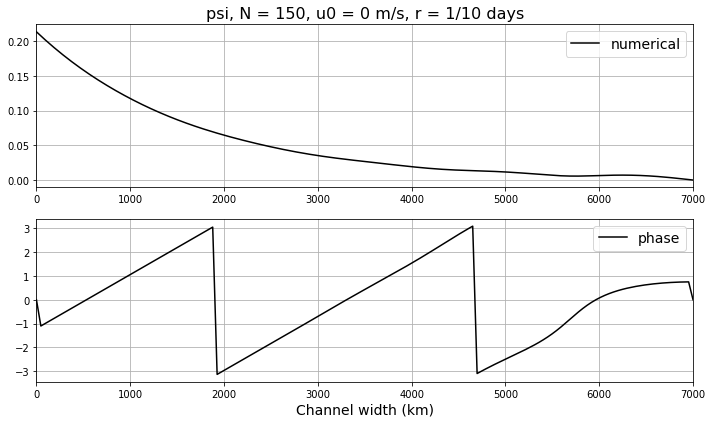

In [210]:
# 2.c.ii.
N = 150 ## CHANGE N HERE!!!
u = 0 # wind 
r = 10
y150_2c, mag150_2c, phase150_2c, wkb_magc, wkb_phasec, u_barc, qyc, l0c, lsqc, acheck, bcheck = get_mag_phase_2cii(N,
                                                                                                                   u,
                                                                                                                   r)
fig, ax = plt.subplots(nrows = 2, figsize = (10,6))

ax[0].plot(y150_2c/1000, mag150_2c, 'k')
#plt.plot(T_surf, tao_values)
ax[0].set_title('psi, N = 150, u0 = 0 m/s, r = 1/10 days', fontsize = 16)
ax[0].set_xlabel('')
#ax[0].set_ylabel('Magnitude', fontsize = 14);
ax[0].grid()
#ax.set_ylim(0, 20);
ax[0].set_xlim(0, 7000);
#plt.axhline(y = pi_B_sfc, color = 'k', linewidth = 1.5, linestyle = '--')
#plt.axhline(y = pi_B_above, color = 'k', linewidth = 1.5, linestyle = ':')
#plt.axhline(y = So, color = 'k', linewidth = 1.5, linestyle = '-.')
ax[0].legend(['numerical', 'WKB'], fontsize = 14)

ax[1].plot(y150_2c/1000, phase150_2c, 'k')
ax[1].set_xlabel('Channel width (km)', fontsize = 14)
#ax[1].set_ylabel('Phase', fontsize = 14);
ax[1].set_xlim(0, 7000);
ax[1].grid()
ax[1].legend(['phase'], fontsize = 14)

plt.tight_layout()

#fig.savefig('atmos_dynamics_2.b.ii.N_150_u_0_r-1_10days.png')

In [232]:
#### 2.c.ii.
# 2.b.i.
# need to get the derivatives for u and l. 
# first try rewriting this function with vectors for u and l0 and lsq

def get_mag_phase_2d(N, u, r_val, c):

    y = np.linspace(0, L, N)
    dy = y[1] - y[0]

    #u = np.zeros(N)
    #u0 = u # CHANGE THIS
    u0 = np.ones((N))
    u0 = u0 * u # u is equal to -10 m/s for this problem
    u_bar = u0 * np.sin((np.pi*y)/L)**4
    uyy = -((4*((np.pi)**2)*u0)/L**2) * (np.sin((np.pi*y)/L)**2) * ((np.sin((np.pi*y)/L)**2) - 3*(np.cos((np.pi*y)/L)**2))
    r = (1 / (r_val * 86400))
    c_new = c + (r/k0)*1j
    lsq = (((beta - uyy)/(u_bar - c_new)) - k0**2)
    l0 = np.array([cm.sqrt(l) for l in lsq])
    qy = beta - uyy
    
    a0 = (1 - (dy*l0[0]*1j) - ((dy**2)*l0[0])/2)**-1
    b0 = (-2j * dy * l0[0]) * (1 - (dy*l0[0]*1j) - ((dy**2)*lsq[0])/2)**-1

    a = np.zeros((N), dtype = 'complex')
    b = np.zeros((N), dtype = 'complex')
    a[0] = a0
    b[0] = b0

    for j in np.arange(1, N, 1):
        a[j] = (2 - ((dy**2)*lsq[j]) - a[j-1])**-1
        b[j] = b[j-1] * (2 - ((dy**2)*lsq[j]) - a[j-1])**-1

    #need to calculate psi_N eqn 22 
    psi_N = b[-2] / (1 - (dy*l0[-2]*1j) - (((dy**2)*lsq[-2])/2) - a[-2]) # should l0 and lsq be the 1st or 2nd to last position
    
    # now to solve for psi have to go backwards
    psi = np.zeros((N), dtype = 'complex')
    #psi[-1] = psi_N
    psi[-1] = 0

    for j in reversed(np.arange(1, N, 1)):
        psi[j-1] = a[j-1]*psi[j] + b[j-1]
    
    # r has to be zero for wkb
    r_val
    r = (1 / (r_val * 86400))
    c_new = c + (r/k0)*1j
    lsq = (((beta - uyy)/(u_bar - c_new)) - k0**2)
    l0 = np.array([cm.sqrt(l) for l in lsq])

    l0_int = np.cumsum(l0) * dy
    wkb_psi = ((l0[0]/l0)**(1/2)) * np.exp(1j * l0_int)  
    
    # get magnitude
    mag = abs(psi)
    wkb_mag = abs(wkb_psi)
    
    # get phase
    phase = np.zeros((N), dtype = 'complex')

    for j in np.arange(1, N):
        phase[j] = cm.phase(psi[j])
        
    wkb_phase = np.zeros((N), dtype = 'complex')

    for j in np.arange(1, N):
        wkb_phase[j] = cm.phase(wkb_psi[j])

    return(y, mag, phase, wkb_mag, wkb_phase, u_bar, qy, l0, lsq, a0, b0)  

In [233]:
# 2.d.
N = 150 ## CHANGE N HERE!!!
u = -10 # wind 
r = 50
c = -5 # m/s
y150_2c, mag150_2c, phase150_2c, wkb_magc, wkb_phasec, u_barc, qyc, l0c, lsqc, acheck, bcheck = get_mag_phase_2d(N, 
                                                                                                                 u, 
                                                                                                                 r, 
                                                                                                                 c)
  

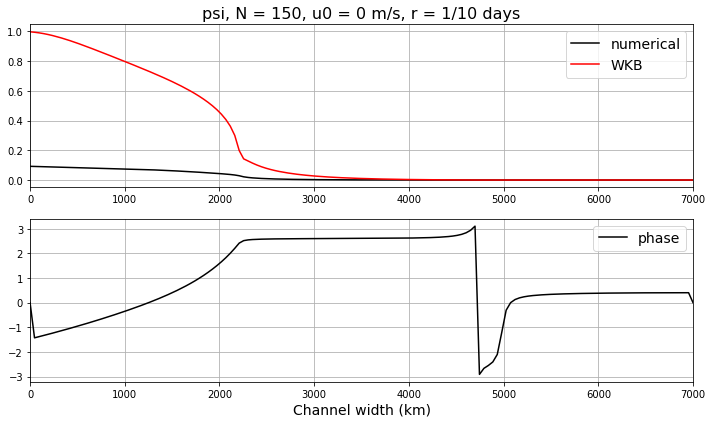

In [236]:
fig, ax = plt.subplots(nrows = 2, figsize = (10,6))

ax[0].plot(y150_2c/1000, mag150_2c, 'k' , y150_2c/1000, wkb_magc, 'r')
#plt.plot(T_surf, tao_values)
ax[0].set_title('psi, N = 150, u0 = 0 m/s, r = 1/10 days', fontsize = 16)
ax[0].set_xlabel('')
#ax[0].set_ylabel('Magnitude', fontsize = 14);
ax[0].grid()
#ax.set_ylim(0, 20);
ax[0].set_xlim(0, 7000);
#plt.axhline(y = pi_B_sfc, color = 'k', linewidth = 1.5, linestyle = '--')
#plt.axhline(y = pi_B_above, color = 'k', linewidth = 1.5, linestyle = ':')
#plt.axhline(y = So, color = 'k', linewidth = 1.5, linestyle = '-.')
ax[0].legend(['numerical', 'WKB'], fontsize = 14)

ax[1].plot(y150_2c/1000, phase150_2c, 'k')
ax[1].set_xlabel('Channel width (km)', fontsize = 14)
#ax[1].set_ylabel('Phase', fontsize = 14);
ax[1].set_xlim(0, 7000);
ax[1].grid()
ax[1].legend(['phase'], fontsize = 14)

plt.tight_layout()

#fig.savefig('atmos_dynamics_2.b.ii.N_150_u_0_r-1_10days.png')

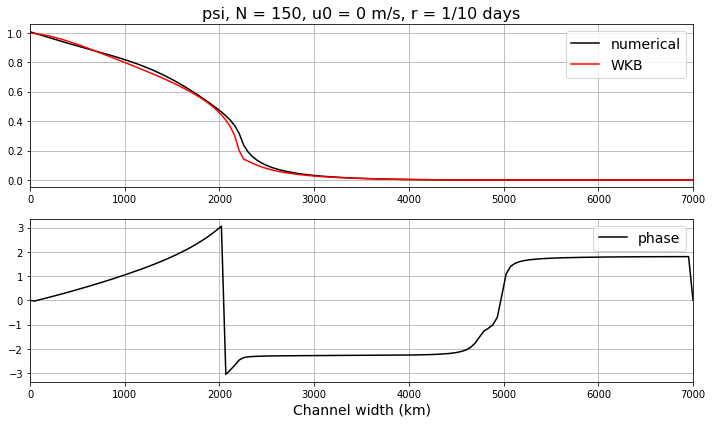

In [250]:
N = 150 ## CHANGE N HERE!!!
u = -10 # wind 
r = 50
c = -5 # m/s

y = np.linspace(0, L, N)
dy = y[1] - y[0]

#u = np.zeros(N)
#u0 = u # CHANGE THIS
u0 = np.ones((N))
u0 = u0 * u # u is equal to -10 m/s for this problem
u_bar = u0 * np.sin((np.pi*y)/L)**4
uyy = -((4*((np.pi)**2)*u0)/L**2) * (np.sin((np.pi*y)/L)**2) * ((np.sin((np.pi*y)/L)**2) - 3*(np.cos((np.pi*y)/L)**2))
r = (1 / (r_val * 86400))
c_new = c + (r/k0)*1j
lsq = (((beta - uyy)/(u_bar - c_new)) - k0**2)
l0 = np.array([cm.sqrt(l) for l in lsq])
qy = beta - uyy

a0 = (1 - (dy*l0[0]*1j) - ((dy**2)*lsq[0])/2)**-1
b0 = (-2j * dy * l0[0]) * (1 - (dy*l0[0]*1j) - ((dy**2)*lsq[0])/2)**-1

a = np.zeros((N), dtype = 'complex')
b = np.zeros((N), dtype = 'complex')
a[0] = a0
b[0] = b0

for j in np.arange(1, N, 1):
    a[j] = (2 - ((dy**2)*lsq[j]) - a[j-1])**-1
    b[j] = b[j-1] * (2 - ((dy**2)*lsq[j]) - a[j-1])**-1

#need to calculate psi_N eqn 22 
psi_N = b[-2] / (1 - (dy*l0[-2]*1j) - (((dy**2)*lsq[-2])/2) - a[-2]) # should l0 and lsq be the 1st or 2nd to last position

# now to solve for psi have to go backwards
psi = np.zeros((N), dtype = 'complex')
#psi[-1] = psi_N
psi[-1] = 0

for j in reversed(np.arange(1, N, 1)):
    psi[j-1] = a[j-1]*psi[j] + b[j-1]

# r has to be zero for wkb
r_val
r = (1 / (r_val * 86400))
c_new = c + (r/k0)*1j
lsq = (((beta - uyy)/(u_bar - c_new)) - k0**2)
l0 = np.array([cm.sqrt(l) for l in lsq])

l0_int = np.cumsum(l0) * dy
wkb_psi = ((l0[0]/l0)**(1/2)) * np.exp(1j * l0_int)  

# get magnitude
mag = abs(psi)
wkb_mag = abs(wkb_psi)

# get phase
phase = np.zeros((N), dtype = 'complex')

for j in np.arange(1, N):
    phase[j] = cm.phase(psi[j])

wkb_phase = np.zeros((N), dtype = 'complex')

for j in np.arange(1, N):
    wkb_phase[j] = cm.phase(wkb_psi[j])

fig, ax = plt.subplots(nrows = 2, figsize = (10,6))

ax[0].plot(y/1000, mag, 'k' , y/1000, wkb_mag, 'r')
#plt.plot(T_surf, tao_values)
ax[0].set_title('psi, N = 150, u0 = 0 m/s, r = 1/10 days', fontsize = 16)
ax[0].set_xlabel('')
#ax[0].set_ylabel('Magnitude', fontsize = 14);
ax[0].grid()
#ax.set_ylim(0, 20);
ax[0].set_xlim(0, 7000);
#plt.axhline(y = pi_B_sfc, color = 'k', linewidth = 1.5, linestyle = '--')
#plt.axhline(y = pi_B_above, color = 'k', linewidth = 1.5, linestyle = ':')
#plt.axhline(y = So, color = 'k', linewidth = 1.5, linestyle = '-.')
ax[0].legend(['numerical', 'WKB'], fontsize = 14)

ax[1].plot(y/1000, phase, 'k')
ax[1].set_xlabel('Channel width (km)', fontsize = 14)
#ax[1].set_ylabel('Phase', fontsize = 14);
ax[1].set_xlim(0, 7000);
ax[1].grid()
ax[1].legend(['phase'], fontsize = 14)

plt.tight_layout()

In [248]:
a0

(-0.0004053899992652689+2.077875466307117e-05j)

In [255]:
# plotting vorticity 
rv = - (qy / (u_bar - c_new)) * psi

In [256]:
rv_mag = abs(rv)

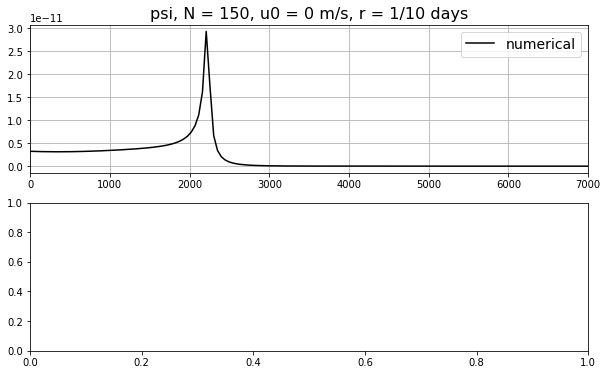

In [257]:
fig, ax = plt.subplots(nrows = 2, figsize = (10,6))

ax[0].plot(y/1000, rv_mag, 'k')
#plt.plot(T_surf, tao_values)
ax[0].set_title('psi, N = 150, u0 = 0 m/s, r = 1/10 days', fontsize = 16)
ax[0].set_xlabel('')
#ax[0].set_ylabel('Magnitude', fontsize = 14);
ax[0].grid()
#ax.set_ylim(0, 20);
ax[0].set_xlim(0, 7000);
#plt.axhline(y = pi_B_sfc, color = 'k', linewidth = 1.5, linestyle = '--')
#plt.axhline(y = pi_B_above, color = 'k', linewidth = 1.5, linestyle = ':')
#plt.axhline(y = So, color = 'k', linewidth = 1.5, linestyle = '-.')
ax[0].legend(['numerical', 'WKB'], fontsize = 14)



In [260]:
# to get imaginary l
lsq_imag = lsq.imag

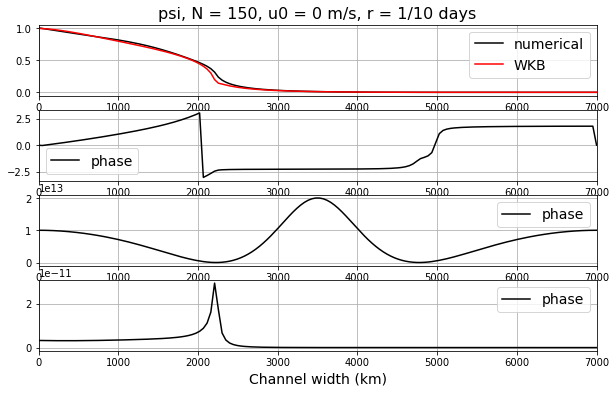

In [263]:
fig, ax = plt.subplots(nrows = 4, figsize = (10,6))

ax[0].plot(y/1000, mag, 'k' , y/1000, wkb_mag, 'r')
#plt.plot(T_surf, tao_values)
ax[0].set_title('psi, N = 150, u0 = 0 m/s, r = 1/10 days', fontsize = 16)
ax[0].set_xlabel('')
#ax[0].set_ylabel('Magnitude', fontsize = 14);
ax[0].grid()
#ax.set_ylim(0, 20);
ax[0].set_xlim(0, 7000);
#plt.axhline(y = pi_B_sfc, color = 'k', linewidth = 1.5, linestyle = '--')
#plt.axhline(y = pi_B_above, color = 'k', linewidth = 1.5, linestyle = ':')
#plt.axhline(y = So, color = 'k', linewidth = 1.5, linestyle = '-.')
ax[0].legend(['numerical', 'WKB'], fontsize = 14)

ax[1].plot(y/1000, phase, 'k')
ax[1].set_xlabel('Channel width (km)', fontsize = 14)
#ax[1].set_ylabel('Phase', fontsize = 14);
ax[1].set_xlim(0, 7000);
ax[1].grid()
ax[1].legend(['phase'], fontsize = 14)

ax[2].plot(y/1000, 1/lsq_imag, 'k')
ax[2].set_xlabel('Channel width (km)', fontsize = 14)
#ax[1].set_ylabel('Phase', fontsize = 14);
ax[2].set_xlim(0, 7000);
ax[2].grid()
ax[2].legend(['phase'], fontsize = 14)

ax[3].plot(y/1000, rv_mag, 'k')
ax[3].set_xlabel('Channel width (km)', fontsize = 14)
#ax[1].set_ylabel('Phase', fontsize = 14);
ax[3].set_xlim(0, 7000);
ax[3].grid()
ax[3].legend(['phase'], fontsize = 14)


